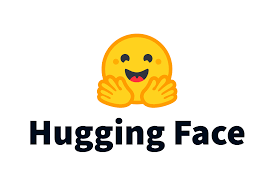
<h1>Hugging Face</h1>

Fuente de este demo: https://www.youtube.com/watch?v=4yhYu1emS3M

## 1. Acerca de Hugging Face y Transformers 
#### Hugging Face:
<i>"Hugging Face, Inc. is an American company that develops tools for building applications using machine learning.[1] It is most notable for its transformers library built for natural language processing applications and its platform that allows users to share machine learning models and datasets."</i> Fuente: Wikipedia.

#### Transformers:
Transformers proporciona API y herramientas para descargar y entrenar fácilmente modelos preentrenados de última generación. El uso de modelos preentrenados puede reducir los costos de cómputo, la huella de carbono y ahorrarle el tiempo y los recursos necesarios para entrenar un modelo desde cero. Fuente: <a href=https://huggingface.co/docs/transformers/index>sitio de Hugging Face</a>

### Clasificación de Modelos
Los modelos pre-entrenados pueden descargarse de: https://huggingface.co/models. Allí se dispone de más de 170.000 modelos pre-entrenados. Y para usarlos, debe descargarse los mismos en forma explícita. Sin embargo, es posible realizar tareas sin usar modelos específicos, pero el "auto-ML" trae problemas con muchos idiomas.
Los Las tareas de modelos pre-entrenados se clasifican en:
* ML multimedial
* Computer Vision
* NLP
* Audio
* Aprendizaje reforzado
## 2. Inicializacion

In [2]:
# Instalación de librerias:
# Una vez instalada, comentar la celda de abajo
#%pip install torch
#%pip install transformers
# Precaución: instalar primero torch y luego transformers (sino, no se instalara correctamente)
# Actualizar librerías:
#%pip install --upgrade numpy scipy scikit-learn
#%pip uninstall transformers numpy scipy scikit-learn
#%pip install transformers numpy scipy scikit-learn
%pip install --force-reinstall numpy

  Using cached numpy-2.1.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 2.1.2 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 2.1.2 which is incompatible.
spacy-transformers 1.3.5 requires transformers<4.37.0,>=3.4.0, but you have transformers 4.46.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importación de Librerias
import torch
from transformers import pipeline
import pandas as pd


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/jorgek/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/jorgek/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/jorgek/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loop.start()
  File "/home/jorgek

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## 3. NLP con Transformers
Debido a que en nuestro proyecto se hace uso intensivo principalmente de herramientas NLP, es en esta rama en la que nos enfocaremos, aunque no lo limitamos a esto.
Los siguientes son algunos modelos NLP que pueden utilizarse:
* "sentiment-analysis" 
* "text-classification" 
* "text-generation"
* "questions-and-answers"

#### Sentiment-analysis
Dado un texto, se lo clasifica por la carga sentimental que trae. Esta puede ser: "POSITIVE", "NEGARIVE" o "NEUTRAL".

In [2]:
analizador = pipeline('sentiment-analysis', model='finiteautomata/beto-sentiment-analysis')
textoUp="Estamos muy entusiasmados en probar cuán simplemente podemos hacer un modelo de sentiment-analysis"
textoDown="Siento mucha frustración cuando mis trabajos no resultan como se planearon"
resultadoUp = analizador(textoUp)
resultadoDown = analizador(textoDown)
print("Up:  ",resultadoUp)
print("Down:",resultadoDown)

Up:   [{'label': 'POS', 'score': 0.9970971345901489}]
Down: [{'label': 'NEG', 'score': 0.9993558526039124}]


### Text-Classification: Zero-Shot-classification
Dado un texto, clasificación zero-shot es la tarea de clasificar clases nunca antes vistas durante el entrenamiento de un modelo.

In [3]:
# El objeto pipeline
clasificador_zero_shot = pipeline("zero-shot-classification", model="Recognai/bert-base-spanish-wwm-cased-xnli")

# Implementación del modelo
texto = "Esta notebook es útil para la enseñanza de modelos de NLP de hugging Face"
etiquetas_candidatas = ["Educación", "Deportes", "Medicina","Biología"]
resultado = clasificador_zero_shot(texto, etiquetas_candidatas)

# Presentación de resultados:
dfResultado=pd.DataFrame()
dfResultado['labels']=resultado['labels']
dfResultado['scores']=resultado['scores']
print(dfResultado) # Imprime la etiqueta con la puntuación más alta

      labels    scores
0  Educación  0.712244
1   Deportes  0.108196
2   Medicina  0.097565
3   Biología  0.081995


### Text-generation:
Dado un pequeño texto, se amplía el mismo siguiendo el sentido del texto inicial.

In [4]:
# Librerias especificas:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Nombre del modelo
nombre_del_modelo = "datificate/gpt2-small-spanish"
# Tokenizar: El tokenizador se encargará de dividir el texto en tokens comprensibles para el modelo.
tokenizador = GPT2Tokenizer.from_pretrained(nombre_del_modelo)

# El modelo
modelo = GPT2LMHeadModel.from_pretrained(nombre_del_modelo)

# Entrada del modelo
textoBase = "la validez de una igualdad"
modelo.config.pad_token_id = modelo.config.eos_token_id
input_ids = tokenizador.encode(textoBase, return_tensors="pt")

In [5]:
# La salida:
resultado = modelo.generate(input_ids, max_length=100, num_return_sequences=1)
texto_generado = tokenizador.decode(resultado[0], skip_special_tokens=True)
print("texto base:     ",textoBase)
print("texto generado: ",texto_generado)

C:\Users\jorge.kamlofsky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\generation\utils.py:1201: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


texto base:      la validez de una igualdad
texto generado:  la validez de una igualdad de derechos y obligaciones, y la libertad de expresión, que se encuentra en la Constitución de la República.

El artículo 1 de la Constitución de la República de Colombia establece que:

El artículo 1 de la Constitución de la República de Colombia establece que:

El artículo 1 de la Constitución de la República de Colombia establece que:

El artículo 1 de la Constitución de la República de Colombia establece que:

El artículo 1 de la Constitución de la


En este ejemplo, max_length es la longitud máxima del texto generado, y num_return_sequences es el número de secuencias de texto que se desea generar.

### Question-Answering
Los modelos de question-answer pueden recuperar la respuesta a una pregunta de un texto dado, lo cual es útil para buscar una respuesta en un documento. Estos modelos buscan generar una respuesta que responda correctamente la pregunta a partir del contexto dado.

In [6]:
# Importar librerias
from transformers import pipeline

# Cargar el modelo
nombre_del_modelo="IIC/beto-base-spanish-sqac"
nlp_qa = pipeline("question-answering", model=nombre_del_modelo, tokenizer=nombre_del_modelo)

C:\Users\jorge.kamlofsky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jorge.kamlofsky\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [7]:
# Contexto:
contexto = "La inteligencia artificial (IA) es un subcampo de la informática que se ocupa de crear programas y sistemas capaces de realizar tareas que normalmente requieren inteligencia humana."

# Preguntas: Descomentar la pregunta que desee realizar
pregunta="¿Cuales son las siglas de 'Inteligencia Artificial'?"
#pregunta="¿Qué es necesario para crear Inteligencia Artificial?"
#pregunta="¿Qué es inteligencia artificial?"
#pregunta="¿dentro de qué disciplina se desarrolla la Inteligencia Artificial?"
#pregunta="¿Qué logramos con Inteligencia Artificial?"
# Respuestas
respuesta = nlp_qa(context=contexto, question=pregunta)
print(respuesta)


{'score': 0.9532824158668518, 'start': 28, 'end': 30, 'answer': 'IA'}


## Otros usos de Huggingface
### Clasificacion en imágenes
Los modelos de clasificación de imágenes se pueden utilizar cuando no estamos interesados en instancias específicas de objetos con información de ubicación o su forma.

In [8]:
from transformers import pipeline
clf = pipeline("image-classification")
# Descomentar la foto que desee que se describa
foto="foto01.png" # monitores de la bolsa de comercio
foto="foto02.png" # vacas
foto="foto03.png" # pinguino
clf(foto)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.853809118270874, 'label': 'king penguin, Aptenodytes patagonica'},
 {'score': 0.01003843080252409, 'label': 'badger'},
 {'score': 0.002955351723358035, 'label': 'pelican'},
 {'score': 0.002916091587394476, 'label': 'sea lion'},
 {'score': 0.001962602837011218, 'label': 'weasel'}]